# AVIRIS-NG Surface Spectral Reflectance
Lessons learned working with the NSIDC dataset.  
__Dataset__: SnowEx 2021; Senator Beck Basin and Grand Mesa  
__Tutorial Author__: [Brent Wilder](https://github.com/brentwilder)

```{admonition} Learning Objectives
- Understand how this data is structured
- Understand where to find necessary terrain and illumination data
- Learn about the `spectral` python package and apply it to this dataset
```

## Computing environment

We'll be using the following open source Python libraries in this notebook:

In [10]:
from spectral import *
import numpy as np
import matplotlib.pyplot as plt

## SnowEx21 Spectral Reflectance Dataset

The data were collected using an airborne imaging spectrometer, AVIRIS-NG can be downloaded from here, https://nsidc.org/data/snex21_ssr/versions/1.
- Reflectance is provided at 5 nm spectral resolution with a range of 380-2500 nm

- For this dataset, the pixel resolution is 4 m

- Data span from 19 March 2021 to 29 April 2021, and were collected in two snow-covered environments in Colorado: Senator Beck Basin and Grand Mesa

- Each file will have a "__.img__" and "__.hdr__". You need to have both of these in the same directory to open data.

<p align="center">
  <img src="https://avirisng.jpl.nasa.gov/img/rmotc_large.png" />
</p>




## Downloading necessary terrain and illumination data

The NSIDC repository does not contain the terrain/illumination information.

However, you can obtain it for the matching flightline (by its timestamp) at the following URL, https://search.earthdata.nasa.gov/ ,

and searching for __"AVIRIS-NG L1B Calibrated Radiance, Facility Instrument Collection, V1"__ 


- You only need to download the "*obs_ort*" files for the flight of interest. Please note these are different than "*obs*" files (ort means orthorectified).


- In the Granule ID search, you can use wildcars "*" on either end of "obs_ort" to reduce your search.

- You may also want to use this bounding box to reduce your search: 


  - SW: 37.55725,-108.58887


  - NE: 39.78206,-106.16309


## Using python package, `spectral`, to open data

```{important}
Update the paths below to your local environment
```

In [ ]:
# INSERT YOUR PATHS HERE
path_to_aviris = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1'
path_to_aviris_hdr = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1.hdr'
path_to_terrain = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1_obs_ort'
path_to_terrain_hdr = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1_obs_ort.hdr'

In [43]:
# Open a test image
aviris = envi.open(path_to_aviris_hdr)

# Save to an array in memory
rfl_array = aviris.open_memmap(writeable=True)

# print shape. You can see here we have 425 spectral bands for a grid of 1848x699 pixels
rfl_array.shape


(1848, 699, 425)

In [44]:
# You can create an array of the bands centers like this
bands = np.array(aviris.bands.centers)
bands

array([ 377.071821,  382.081821,  387.091821,  392.101821,  397.101821,
        402.111821,  407.121821,  412.131821,  417.141821,  422.151821,
        427.161821,  432.171821,  437.171821,  442.181821,  447.191821,
        452.201821,  457.211821,  462.221821,  467.231821,  472.231821,
        477.241821,  482.251821,  487.261821,  492.271821,  497.281821,
        502.291821,  507.301821,  512.301821,  517.311821,  522.321821,
        527.331821,  532.341821,  537.351821,  542.361821,  547.361821,
        552.371821,  557.381821,  562.391821,  567.401821,  572.411821,
        577.421821,  582.431821,  587.431821,  592.441821,  597.451821,
        602.461821,  607.471821,  612.481821,  617.491821,  622.491821,
        627.501821,  632.511821,  637.521821,  642.531821,  647.541821,
        652.551821,  657.561821,  662.561821,  667.571821,  672.581821,
        677.591821,  682.601821,  687.611821,  692.621821,  697.621821,
        702.631821,  707.641821,  712.651821,  717.661821,  722.

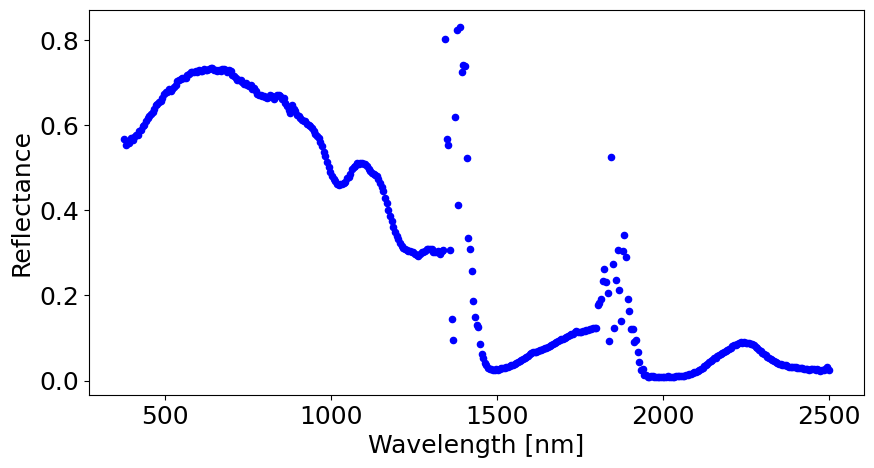

In [68]:
# A simple data visalization by selecting random indices
i = 900
j = 300
pixel = rfl_array[i,j,:]

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.rcParams.update({'font.size': 18})
ax.scatter(bands, pixel, color='blue', s=20)
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Reflectance')
plt.show()

## Lastly, a very important note!
Please notice that convention for aspect follows $-\pi$ to $\pi$.

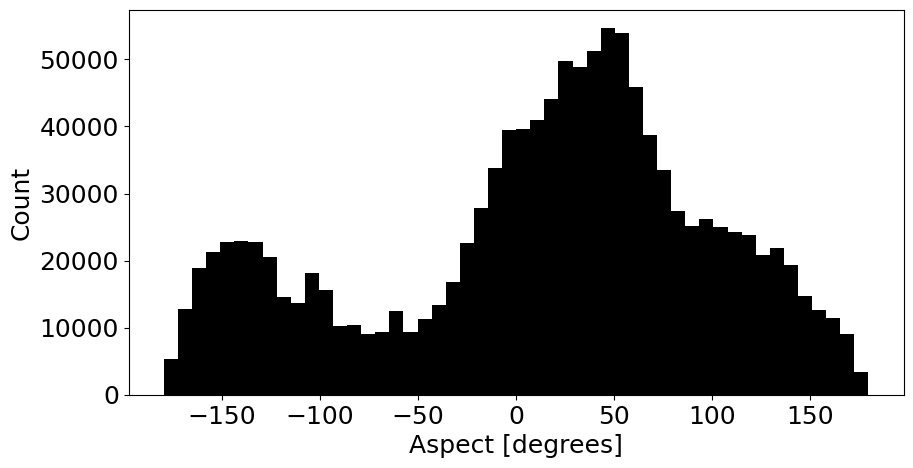

In [94]:
# Terrain bands:
# 0 - Path length (m)
# 1 - To sensor azimuth
# 2 - To sensor zenith
# 3 - To sun azimuth
# 4 - To sun zenith
# 5 - Solar phase
# 6 - Slope
# 7 - Aspect
# 8 - cosine(i) (local solar illumination angle)
# 9 - UTC Time
# 10 - Earth-sun distance (AU)

# open envi object
terrain = envi.open(path_to_terrain_hdr)

# Save to an array in memory
terrain_array = terrain.open_memmap(writeable=True)

# Grab just aspect and flatten (remove nan)
aspects = terrain_array[:,:,7].flatten()
aspects = aspects[aspects>-9999]


# Plot a histogram to show aspect range
fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.rcParams.update({'font.size': 18})
ax.hist(aspects, color='black', bins=50)
ax.set_xlabel('Aspect [degrees]')
ax.set_ylabel('Count')
plt.show()




## References

To further explore these topics:

* https://snowex-2022.hackweek.io/tutorials/aviris-ng/AVIRIS-NG_Tutorial.html

* https://www.spectralpython.net/#documentation